# RBOB Data Excercise

## Introduction
Having read the descripction of the excercise, it looks pretty obvius that five (5) of all set of collumns provided in the file are the one we have interest in.
Nontheless, first time we face a file, we have not much knowledge of it's structure and data state, so I'm doing this notebook to face the file and get out some conclussions that I hope to be able to
apply in the final cleanin, plotting and detecting and erasing outliers

In [239]:
### Importing libraries -- Used libraries during the script execution will be specified here
import pandas as pd
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [240]:
## Data Preparation
### Reading a CSV File
data_df = pd.read_csv("C:/SpartaTest/RBOB_data_test.csv")

data_df

,generated_on,display_name,disch_port,route,sparta_route_code,vessel_type,load_month,load_window,load_date,sailing_speed,...,sales_price_month,sale_price,gen_blender_margin,pseudo_fob_refinery,pseudo_cif_refinery,margin_units,cotd_gen_blender_margin,cotd_gen_blender_margin_color,cotd_gen_blender_margin_close,load_region
0,2021-09-20 00:11:20.045,RBOB,NEW YORK,NaN,AMSNEWMR,MR,Oct.21,NaN,15.10.21,12.5,...,Oct,-16.00,-4.535471,-1.535471,0.464529,cpg,0.188593,GREEN,-4.724065,ARA
1,2021-09-20 00:11:20.045,RBOB,NEW YORK,NaN,AMSNEWMR,MR,Nov.21,NaN,15.11.21,12.5,...,Nov,-16.00,-3.574431,-0.574431,1.425569,cpg,0.074858,GREEN,-3.649289,ARA
2,2021-09-20 00:11:20.045,RBOB,NEW YORK,NaN,AMSNEWMR,MR,Dec.21,NaN,15.12.21,12.5,...,Dec,-16.00,-1.252142,1.747858,3.747858,cpg,-0.003922,RED,-1.248220,ARA
3,2021-09-20 00:11:20.045,RBOB,NEW YORK,NaN,AMSNEWMR,MR,Jan.22,NaN,15.01.22,12.5,...,Jan,-15.75,1.425285,4.425285,6.425285,cpg,0.005272,GREEN,1.420013,ARA
4,2021-09-20 00:11:20.045,RBOB,NEW YORK,NaN,AMSNEWMR,MR,Feb.22,NaN,15.02.22,12.5,...,Mar,-27.75,1.790606,4.790606,6.790606,cpg,-0.054943,RED,1.845550,ARA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,23.09.21 20:55,RBOB,NEW YORK,NaN,AMSNEWMR,MR,Sep.21,NaN,27.09.21,12.5,...,Oct,-10.50,-0.741034,2.258966,4.258966,cpg,1.097155,GREEN,-1.838190,ARA
2846,24.09.21 20:55,RBOB,NEW YORK,NaN,AMSNEWMR,MR,Nov.21,NaN,15.11.21,12.5,...,Nov,-12.50,-4.544336,-1.544336,0.455664,cpg,-3.261739,RED,-1.282596,ARA
2847,24.09.21 20:55,RBOB,NEW YORK,NaN,AMSNEWMR,MR,Dec.21,NaN,15.12.21,12.5,...,Dec,-12.50,-2.735502,0.264498,2.264498,cpg,-3.282035,RED,0.546533,ARA
2848,24.09.21 20:55,RBOB,NEW YORK,NaN,AMSNEWMR,MR,Jan.22,NaN,15.01.22,12.5,...,Jan,-12.50,-0.455087,2.544913,4.544913,cpg,-3.266719,RED,2.811632,ARA


In [241]:
### Having in mind how the dataset look like let's fix it accordignly
### Header goes in the first line:
data_df = pd.read_csv("C:/SpartaTest/RBOB_data_test.csv", header=[0],sep=",")

#### Initially keep selected columns
data_df=data_df[['generated_on','display_name','load_month','dlvd_price']]
data_df.infer_objects().info()
#### Let's get a tates of data types
data_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   generated_on  2850 non-null   object 
 1   display_name  2850 non-null   object 
 2   load_month    2850 non-null   object 
 3   dlvd_price    2850 non-null   float64
dtypes: float64(1), object(3)
memory usage: 89.2+ KB


,generated_on,display_name,load_month,dlvd_price
0,2021-09-20 00:11:20.045,RBOB,Oct.21,-11.45
1,2021-09-20 00:11:20.045,RBOB,Nov.21,-12.45
2,2021-09-20 00:11:20.045,RBOB,Dec.21,-14.75
3,2021-09-20 00:11:20.045,RBOB,Jan.22,-17.20
4,2021-09-20 00:11:20.045,RBOB,Feb.22,-29.55
...,...,...,...,...
2845,23.09.21 20:55,RBOB,Sep.21,-9.75
2846,24.09.21 20:55,RBOB,Nov.21,-7.95
2847,24.09.21 20:55,RBOB,Dec.21,-9.75
2848,24.09.21 20:55,RBOB,Jan.22,-12.05


So we count with 2850 rows.
Let's take a look to data types and see what we can do with the values.


## Data Preparation
### Data types
- gerated_on it's celarly a timestamp
- display_name goes directly in a string
- load_month could be splitted in two, but having in mind the exercise definition, it will represent perfectly our 5 different lines or variables to plot. Let's keep it this way. Besides, the detailed definition of the generated_on column, will let us to draw a perfect x absis in our future plot.
- dlvd_price fits correclty in a float

### Missing values
#### Null values
Would'nt like to find out that there's a relationship between a missing value and some other columns related to the ones we have interest on.
Sou we will be using the whole dataset again


In [242]:
#data_df = pd.read_csv("C:/SpartaTest/RBOB_data_test.csv", header=[0],sep=",")
#pd.options.display.max_columns # Its says 20
#pd.set_option("display.max_columns",None)
data_df.isnull().sum()

generated_on    0
display_name    0
load_month      0
dlvd_price      0
dtype: int64

Not to worry about Null values

In [243]:
#### NaN values
data_df.isna().sum()

generated_on    0
display_name    0
load_month      0
dlvd_price      0
dtype: int64

It looks like the data we're interested in doesn't need missing values cleaning.
Let's pass to cast and transform data to our benefit

In [244]:
### Casting and getting data ready
data_df['generated_on_dt']=pd.to_datetime(data_df['generated_on'])
data_df=data_df.astype({'display_name':'string','load_month':'string','dlvd_price':'float'})
data_df.dtypes

generated_on               object
display_name               string
load_month                 string
dlvd_price                float64
generated_on_dt    datetime64[ns]
dtype: object

In [245]:
### Date appears to be in two different formats
### We should unify date formats before we proceed to analyse that field
def date_conv(src):
    return pd.to_datetime(src)


data_df['generated_on'] = data_df['generated_on'].apply(date_conv)
data_df.dtypes

generated_on       datetime64[ns]
display_name               string
load_month                 string
dlvd_price                float64
generated_on_dt    datetime64[ns]
dtype: object

In [246]:
#So we have 475 different generated_on dates, 6 load_months, and the combination of the generated_on date plus the load month has no duplicates. (475*6=2850)
#data_df.groupby(['generated_on','load_month']).size().reset_index(name='counts')
# Let's convert it to a fixed string. At the end, we will write on a CSV file, so let's put all dates with the same format.
data_df['generated_on'] = data_df['generated_on'].dt.strftime('%Y-%m-%d %H:%M:%S')
#data_df.dtypes --> generated_on_cnv_str  object
#Check that we don't find duplicates after loss of precision
data_df.groupby(['generated_on', 'load_month']).size().reset_index(name='counts').nunique()

generated_on    475
load_month        6
counts            1
dtype: int64

In [247]:
### Getting some idea of the values -- display_name column
data_df.groupby(['display_name', 'load_month']).size().reset_index(name='counts')

,display_name,load_month,counts
0,RBOB,Dec.21,475
1,RBOB,Feb.22,475
2,RBOB,Jan.22,475
3,RBOB,Nov.21,475
4,RBOB,Oct.21,475
5,RBOB,Sep.21,475


In [248]:
### Getting some idea of the values -- display_name column
data_df.groupby(['load_month','dlvd_price']).size().reset_index(name='counts')

,load_month,dlvd_price,counts
0,Dec.21,-14.90,4
1,Dec.21,-14.85,3
2,Dec.21,-14.80,7
3,Dec.21,-14.75,8
4,Dec.21,-14.70,5
...,...,...,...
373,Sep.21,-7.45,2
374,Sep.21,-7.40,2
375,Sep.21,-7.35,2
376,Sep.21,-7.25,3


## Getting structure ready to plot the data
So each data field looks pretty nice, but in order to get the desired plot (5 lines on y-axis over time on x-axis), transforming load_month into one column per value feels better.
We will transform long data into wide data over the values of load_month.

In [249]:
#data_df = data_df.pivot(data_df, index='generated_on', columns=['display_name','load_month'], values='dlvd_price')
plot_data_df = data_df.pivot_table(index = ['generated_on','display_name'], values = 'dlvd_price',columns = 'load_month')
plot_data_df=plot_data_df.reset_index()
plot_data_df=plot_data_df[['generated_on','display_name','Sep.21','Oct.21','Nov.21','Dec.21','Jan.22','Feb.22']]

In [250]:
## Select the final dataframe structure
#data_df=data_df[['generated_on','display_name','load_month','dlvd_price']]
#data_df.rename(columns={"generated_on_cnv": "generated_on"}, errors="raise")
#data_df.set_index('generated_on')
## Let's prepare the output
data_df.to_csv('C:/SpartaTest/Clean_RBOB.csv',index=True)
data_df

,generated_on,display_name,load_month,dlvd_price,generated_on_dt
0,2021-09-20 00:11:20,RBOB,Oct.21,-11.45,2021-09-20 00:11:20.045
1,2021-09-20 00:11:20,RBOB,Nov.21,-12.45,2021-09-20 00:11:20.045
2,2021-09-20 00:11:20,RBOB,Dec.21,-14.75,2021-09-20 00:11:20.045
3,2021-09-20 00:11:20,RBOB,Jan.22,-17.20,2021-09-20 00:11:20.045
4,2021-09-20 00:11:20,RBOB,Feb.22,-29.55,2021-09-20 00:11:20.045
...,...,...,...,...,...
2845,2021-09-23 20:55:00,RBOB,Sep.21,-9.75,2021-09-23 20:55:00.000
2846,2021-09-24 20:55:00,RBOB,Nov.21,-7.95,2021-09-24 20:55:00.000
2847,2021-09-24 20:55:00,RBOB,Dec.21,-9.75,2021-09-24 20:55:00.000
2848,2021-09-24 20:55:00,RBOB,Jan.22,-12.05,2021-09-24 20:55:00.000


### Plotting data

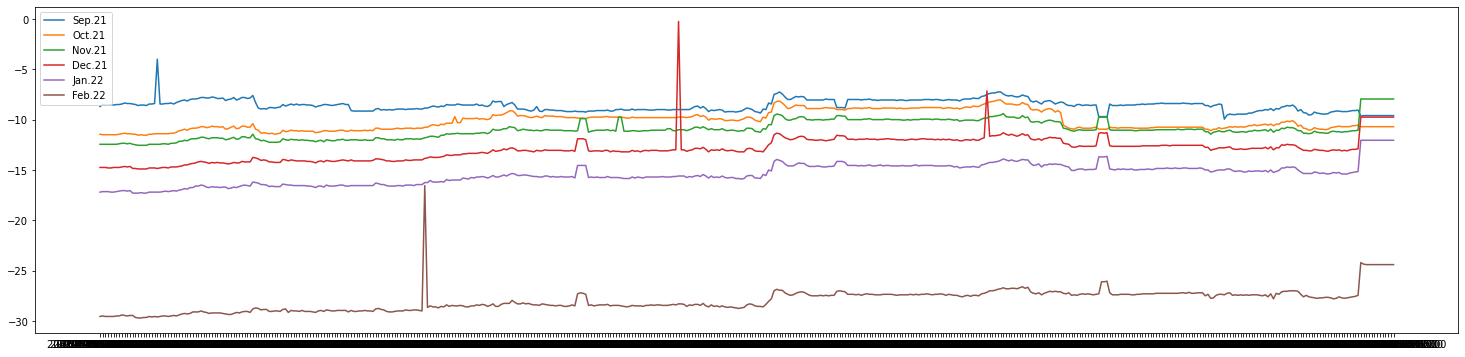

In [251]:
# Create figure
fig = plt.figure() 
# Figure size
fig.set_size_inches(25.5, 6)

plt.plot(plot_data_df['generated_on'], plot_data_df['Sep.21'], label = "Sep.21")
plt.plot(plot_data_df['generated_on'], plot_data_df['Oct.21'], label = "Oct.21")
plt.plot(plot_data_df['generated_on'], plot_data_df['Nov.21'], label = "Nov.21")
plt.plot(plot_data_df['generated_on'], plot_data_df['Dec.21'], label = "Dec.21")
plt.plot(plot_data_df['generated_on'], plot_data_df['Jan.22'], label = "Jan.22")
plt.plot(plot_data_df['generated_on'], plot_data_df['Feb.22'], label = "Feb.22")
plt.legend()
plt.show()

## Outlier identification

Now that we see data plotted, some outlier are quite obvious to identify just by eyesight.
Based on the shor list of extreme values, in order to identify and delete them as part of the cleaning and data prepartion system, we will focus on 5 and 95 percentiles.
Everythin localted betwen 5 an 95 percentiles will be the data to be kept.
Let's get a taste of the possible outlier for every "load-month" variable.

<AxesSubplot:>

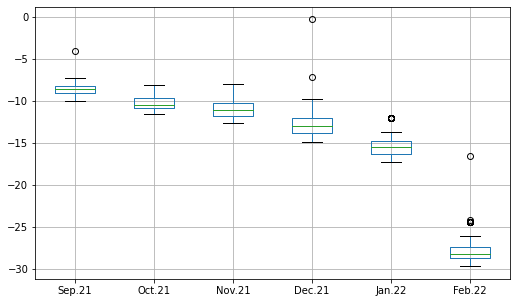

In [252]:
# Create figure
fig = plt.figure() 
# Figure size
fig.set_size_inches(8.5, 5)
#sns.boxplot(y='dlvd_price', x='Sep.21',data=plot_data_df)
#plt.show()
#sns.boxplot(data=plot_data_df)
box=plot_data_df.boxplot(column=['Sep.21','Oct.21','Nov.21','Dec.21','Jan.22','Feb.22'])
box
#sns.boxplot(data=pd.melt(plot_data_df['Oct.21']))
#plot_data_df.info()

### IQR Strategy

The interquartile range tries to define a range of values based on the data value and it's appearing frequency (cummulative frequency).

In [253]:
# Interquartile method implementation
# The strategy proposes to define the inner value ranges (Q3-Q1) and use a multiplier trying to identificate possible Outliers
# This method identifies the outliers of the selected columns and returns that column after the removal has been applied.
def Quantile_Outlier_removal(df,column):
    col = df[column]
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    outliers = col[((col < (Q1 - 1.5 * IQR)) |(col > (Q3 + 1.5 * IQR)))]
    #removed_outliers = col[~(col.between(col.quantile(.01), col.quantile(.99)))]
    #print("Removing for column: ", col, "\n", removed_outliers.value_counts())
    #col = np.where(((col < (mean-3*std)) | (col > (mean+3*std))), mean,col)
    col = np.where(((col < (Q1 - 1.5 * IQR)) |(col > (Q3 + 1.5 * IQR))), np.NaN,col)
    print("Number of identified Outliers for colum ",column,": ", np.count_nonzero(np.isnan(col)))
    #new_mean = np.nanmean(col)
    #col = no.where(np.isnan(col),new_mean,col)
    #return col

In [254]:
# Applying the IQR strategy to remove outliers
backup_df = plot_data_df.copy(deep=True)
for col in ['Sep.21','Oct.21','Nov.21','Dec.21','Jan.22','Feb.22']:
    #print("Running outlier cleaner for column: ", col)
    backup_df[col]=Quantile_Outlier_removal(backup_df,col)

Number of identified Outliers for colum  Sep.21 :  1
Number of identified Outliers for colum  Oct.21 :  0
Number of identified Outliers for colum  Nov.21 :  0
Number of identified Outliers for colum  Dec.21 :  2
Number of identified Outliers for colum  Jan.22 :  13
Number of identified Outliers for colum  Feb.22 :  14


Looks like IQR method is identifying quite several outlier for January an February comparing to our plot. We should consider exploring other ways.


### Quantile strategy

Same idea as before, but we will try narrowing the extreme ranges to find values out of the 1st and 99th percentiles.

In [259]:
# Quantile method implementation
# The strategy proposes to define the inner value ranges (Q3-Q1) and use a multiplier trying to identificate possible Outliers
# This method identifies the outliers of the selected columns and returns that column after the removal has been applied.
def Quantile_Outlier_removal(df,column):
    col = df[column]
    low_range = col.quantile(0.01)
    high_range = col.quantile(0.99)
    outliers = col[~(col.between(low_range, high_range))]
    col = np.where(~(col.between(low_range, high_range)), np.NaN,col)
    print("Number of identified Outliers for colum ",column,": ", np.count_nonzero(np.isnan(col)))
    #new_mean = np.nanmean(col)
    #col = no.where(np.isnan(col),new_mean,col)
    #return col

In [260]:
# Applying the IQR strategy to remove outliers
backup_df = plot_data_df.copy(deep=True)
for col in ['Sep.21','Oct.21','Nov.21','Dec.21','Jan.22','Feb.22']:
    #print("Running outlier cleaner for column: ", col)
    backup_df[col]=Quantile_Outlier_removal(backup_df,col)

Number of identified Outliers for colum  Sep.21 :  9
Number of identified Outliers for colum  Oct.21 :  7
Number of identified Outliers for colum  Nov.21 :  5
Number of identified Outliers for colum  Dec.21 :  6
Number of identified Outliers for colum  Jan.22 :  5
Number of identified Outliers for colum  Feb.22 :  8


It's not an interesting strategy taking in mind our data.
Let's focus just in values and try to user another way to mark and solve our Outliers.

### Dinstance from the mean

In [266]:
# Let's get a taste of the average value and try to identify extreme values with the distance of the value from the mean of the dataset.
# The strategy calculates the mean of the variable and it's standard deviation.
# Then we will try to match extreme values setting up the limits multiplyng N times the standar deviation and adding it to the mean in both directions (positive and netagively)
# This method identifies the outliers of the selected columns and returns that column after the removal has been applied.
def Quantile_Outlier_removal(df,column):
    col = df[column]
    std = col.std()
    mean = col.mean()
    col = np.where(((col < (mean-4*std)) | (col > (mean+4*std))), np.NaN,col)
    print("Number of identified Outliers for colum ",column,": ", np.count_nonzero(np.isnan(col)))
    new_mean = np.nanmean(col)
    col = np.where(np.isnan(col), new_mean, col)
    return col

In [267]:
# Applying the IQR strategy to remove outliers
backup_df = plot_data_df.copy(deep=True)
for col in ['Sep.21','Oct.21','Nov.21','Dec.21','Jan.22','Feb.22']:
    #print("Running outlier cleaner for column: ", col)
    backup_df[col]=Quantile_Outlier_removal(backup_df,col)

Number of identified Outliers for colum  Sep.21 :  1
Number of identified Outliers for colum  Oct.21 :  0
Number of identified Outliers for colum  Nov.21 :  0
Number of identified Outliers for colum  Dec.21 :  2
Number of identified Outliers for colum  Jan.22 :  0
Number of identified Outliers for colum  Feb.22 :  1


Now it look that we have something closer to what we expected at first sight of the plot.
Beside, instead of deleting the whole row of data every time we identify an Outlier, I've decided to replace that "wrong" data with the "real mean" (the mean value not taking in mind those outliers).
This can be decided in other ways, but I didn't think "fair" lossing values from other variables at the same generated_on time every time an Outlier is identified.
The box-plot now looks like this:

<AxesSubplot:>

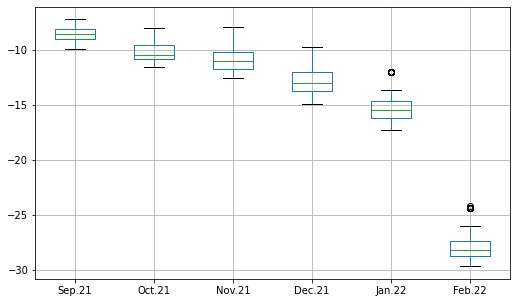

In [268]:
nout_df=backup_df

#Plot
# Create figure
fig = plt.figure() 
# Figure size
fig.set_size_inches(8.5, 5)
#sns.boxplot(y='dlvd_price', x='load_month',data=nout_df)
#plt.xticks(rotation=90)
#plt.ylabel('Delivered Price')
box=nout_df.boxplot(column=['Sep.21','Oct.21','Nov.21','Dec.21','Jan.22','Feb.22'])
box

and our trated dataset now looks like this:

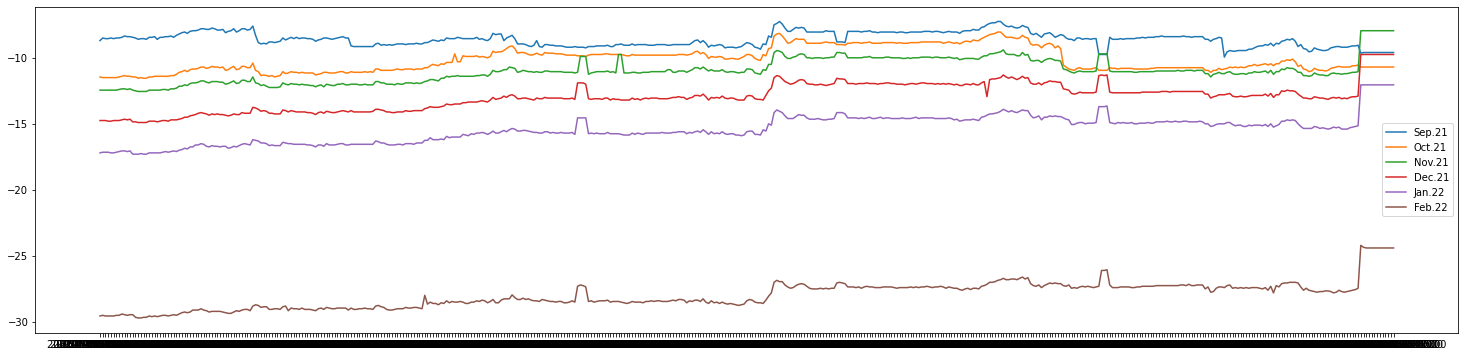

In [269]:
#data_df = data_df.pivot(data_df, index='generated_on', columns=['display_name','load_month'], values='dlvd_price')
#plot_data_df = nout_df.pivot_table(index = ['generated_on','display_name'], values = 'dlvd_price',columns = 'load_month')
#plot_data_df=plot_data_df.reset_index()
#plot_data_df=plot_data_df[['generated_on','display_name','Sep.21','Oct.21','Nov.21','Dec.21','Jan.22','Feb.22']]
plot_data_df = nout_df

# Create figure
fig = plt.figure() 
# Figure size
fig.set_size_inches(25.5, 6)

plt.plot(plot_data_df['generated_on'], plot_data_df['Sep.21'], label = "Sep.21")
plt.plot(plot_data_df['generated_on'], plot_data_df['Oct.21'], label = "Oct.21")
plt.plot(plot_data_df['generated_on'], plot_data_df['Nov.21'], label = "Nov.21")
plt.plot(plot_data_df['generated_on'], plot_data_df['Dec.21'], label = "Dec.21")
plt.plot(plot_data_df['generated_on'], plot_data_df['Jan.22'], label = "Jan.22")
plt.plot(plot_data_df['generated_on'], plot_data_df['Feb.22'], label = "Feb.22")
plt.legend()
plt.show()

Still some small peaks appearing, but these values are not than extreme to be marked as Outliers.

## Conclusions

This steps have been written and tested in order to follow some exploratory data analysis.
It's part of the solution, but will not be part of the program.
The idea is to write down the porgram code as clean as possible, in a very concrete way as the decisions have alredy been taken.